# Lab 4: A * algoritmus

## Definitions

In A* algorithm, the choice of the next node $n$ to expand is the one that minimizes the function
$$\begin{align}
f(n) = g(n) + h(n)
\end{align}$$

**Admissibility**

A heuristic is admissible if it never overestimates the cost to the
goal (the heuristic is always optimistic)
$$\begin{align}
h(n) ≤ h^*(n) \ \forall n \in N.
\end{align}$$

**Consistency**

Consider two nodes in the search tree, $n$ and $n_0$, such that $n_0$ is reached immediately by making an action in $n$. Denote $c(n, n0)$ the cost for this action. A heuristic is consistent if
$$\begin{align}
h(n) ≤ h(n_0) + c(n, n_0)
\end{align}$$
holds for all the nodes of the tree.

## Task 1 - Admissible vs. Consistent heuristic
Every admissible heuristic is consistent. True or false?



Explain why a consistent heuristic must also be admissible. You may assume that the heuristic value at a goal node is always 0.



## Task 2

Consider a following graph, with heuristic $h(N)$ for each node $N$.

<img src="https://i.ibb.co/5K3tZky/Graph-AStar.png" style="width: 400px;"/>

Is given heuristic admissible and consistent?


In which order and with which costs would Uniform-cost search (Dijsktra's algorithm) process nodes if it started in the initial state?


Use A* algorithm with heuristic $h$ to find a path from initial node $S$ to the goal node $G$. How many nodes were popped from the queue and how many expansions were done?


Is found path optimal?



## Task 3

True or False?

In the game Snake:
1.   Euclidian distanse is an admissable heuristic for path-planning
2.   Manhattan distanse is an admissable heuristic for path-planning
3.   Manhattan distance is an admissable heuristic for the smallest number of moves that the snake has to make from point A(start) to B(apple) (a move is changing the direction of the snake)


True or False?

Depth-first search always expands at least as many nodes as A∗ search with an admissible heuristic.



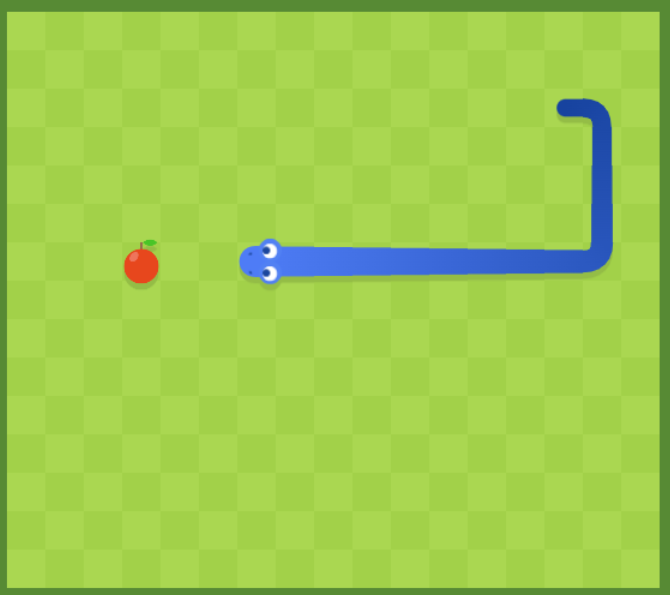

## Task 4

Consider flooded area represented by rectangular grid $ X \times Y$ and each cell is represented as $ b_{xy} $. In the area, there are people that need to be rescued and transported to a safe cell (cell $ b_{\bullet \bullet} $)), which is outside of the $ X \times Y$ grid. The safe cell is accessible only from cell $ b_{00} $

Each cell $ b_{xy} $ can contain $0$ to $n$ people.
$n_{xy}$ denotes amount of people in cell $b_{xy}$.
Rescuers have a single helicopter that can carry $m$ people.
The starting point for the helicopter is $ b_{\bullet \bullet} $, and we assume that it has infinite fuel. In a single move, the helicopter can move from the current cell to any adjacent cell in 8 directions (up, down, left, right, and 4 diagonal directions) or load/offload 1 person.

The goal is to find the shortest sequence of actions that transports all people to safety (all people are transported to $b_{\bullet \bullet} $, and the helicopter is empty).

<img src="https://i.ibb.co/wQnMcBR/helicopter.png" style="width: 400px;"/>

Decide if any of following heuristics is admissible:

$h = \sum_{i \in X, j \in Y} n_{ij}$


$h = \sum_{i \in X, j \in Y} \frac{n_{ij}}{m}$


$h = \sum_{i \in X, j \in Y} sgn(n_{ij})\cdot(i+j)$


$h = \sum_{i \in X, j \in Y} n_{ij} \cdot(i+j)$


$h = \sum_{i \in X, j \in Y} n_{ij} \cdot(\max\{i,j\})$


$h = \sum_{i \in X, j \in Y} \left[sgn(n_{ij})\cdot(\max\{i,j\}) + n_{ij}\right]$



## Example - N Puzzle

- Puzzle with N×N numbered tiles.
- Tiles are in random order with one tile missing (in our case, the missing tile is represented by 0).
- The goal is to place tiles in order (And zero in bottom right corner).
- Allowed actions are sliding the tiles to empty space.


Example of 4x4 Puzzle:

<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/15-puzzle_magical.svg" width="200" height="200"/>



Implementation follows template from lecture 1, with several modifications:

- State class
    - Parent state and corresponding action are included in State object as history attribute.
    - State has cost attribute, which corresponds the number of steps needed to reach the state from initial state.
    - State has priority attribute that is used for priority queue.
    - State objects can be compared based on their priorty using "<" operator.

- Solver function
    - Uses priority queue instead of list.

In [ ]:
import numpy as np
from copy import deepcopy
from typing import List, Tuple, Dict, Callable
from queue import PriorityQueue

Action = str

class State:
    def __init__(self, board: np.array, cost=0, priority=None, history=(None, None)) -> None:
        self.board = board
        self.cost = cost
        self.priority = priority
        self.history = history
        self.N = board.shape[0]
        self.solved_board = np.roll(np.arange(self.N*self.N), -1).reshape(self.N, self.N)

    def actions(self) -> List[Action]:
        """
        :return: list of actions available at the current state.
        """
        return [
            "u",  # Swap up
            "d",  # Swap down
            "l",  # Swap left
            "r",  # Swap right
        ]

    def apply(self, action: Action) -> None:
        """
        Change current state by applying an action.
        """

        assert action in self.actions()
        i, j = self.blank_position()

        # Swaps positions if possible.
        b = self.board
        if action == "u" and i-1 >= 0:
            b[i][j], b[i - 1][j] = b[i - 1][j], b[i][j]
        elif action == "d" and i+1 < self.N:
            b[i][j], b[i + 1][j] = b[i + 1][j], b[i][j]
        elif action == "l" and j-1 >= 0:
            b[i][j], b[i][j - 1] = b[i][j - 1], b[i][j]
        elif action == "r" and j+1 < self.N:
            b[i][j], b[i][j + 1] = b[i][j + 1], b[i][j]

    def copy(self) -> "State":
        """
        Make a copy of the current state.
        """
        return State(deepcopy(self.board), self.cost, self.priority, self.history)

    def shuffle(self, steps=1000) -> None:
        """
        Inplace shuffle of current state by applying random actions.
        """
        for i in range(steps):
            action = np.random.choice(self.actions())
            self.apply(action)

    def blank_position(self) -> Tuple[int, int]:
        # Find blank position - it is denoted as 0 digit.
        for i in range(self.N):
            for j in range(self.N):
                if self.board[i][j] == 0:
                    return i, j
        raise RuntimeError("Invalid board: No blank position found")

    def is_goal(self) -> bool: # True if boar is solved.
        return (self.board == self.solved_board).all()

    def __lt__(self, other) -> bool: # Overrides "<" operator, needed in PriorityQueue.
        return self.priority < other.priority

    def __str__(self) -> str:
        return str(self.board)

    def __eq__(self, other) -> bool:
        return str(self) == str(other)

    def __hash__(self) -> int:
        return hash(str(self))

    def __repr__(self) -> str:
        return str(self)


def reconstruct_path(closed: Dict[State, Tuple[Action, State]],
                     init_state: State,
                     last_state: State) -> List[Action]:
    action, prev_state = closed[last_state]
    path = [action]
    while prev_state != init_state:
        action, prev_state = closed[prev_state]
        path.append(action)
    return list(reversed(path))


def solver(init_state: State, evaluate: Callable) -> Tuple[List[Action], int]:
    opened = PriorityQueue()
    closed = dict()
    state = init_state.copy()
    state.priority = 0
    opened.put(state)

    while not opened.empty():
        state = opened.get()
        action, prev_state = state.history
        if state.is_goal():
            closed[state] = (action, prev_state)
            return reconstruct_path(closed, init_state, last_state=state), len(closed)

        if state in closed:  # State already visited ...
            continue
        else:
            closed[state] = action, prev_state

        for action in state.actions():
            next_state = state.copy()
            next_state.apply(action)
            next_state.history = (action, state)
            next_state.cost += 1
            next_state.priority = evaluate(next_state)
            opened.put(next_state)

    return [], len(closed)

## Task 5 - N Puzzle heuristic

- What is suitable heuristic for N Puzzle?


- Would the heuristic still be admissible if we multiply it by $w > 1$?


- Is it reasonable to use such a weighting $w$ of the heuristic?


- Implement the heuristic.


In [ ]:
class NPuzzleHeuristic():
    # TODO: Implement this method.
    def heuristic(self, state) -> int:

        # raise NotImplementedError


class BFS():
    def __call__(self, state) -> int:
        return state.cost

class Greedy(NPuzzleHeuristic):
    def __call__(self, state) -> int:
        return self.heuristic(state)

class AStar(NPuzzleHeuristic):
    def __init__(self, weight=1.0) -> None:
        self.weight = weight

    def __call__(self, state) -> int:
        return state.cost + self.weight * self.heuristic(state)

## Examples
- Compare the performance of uninformed search, greedy best first, A* and its weighted variants.

In [ ]:
# Create new initial state (for N>3 BFS is not feasible).
N = 3
state = State(np.roll(np.arange(N*N), -1).reshape(N,N))
state.shuffle(1000)

# Or, use this one
state = State(np.array([[8, 4, 6],[1, 3, 7], [5, 2, 0]]))

display(state)

In [ ]:
path, expanded = solver(state, BFS())
print(f"Uninformed search")
print(f"Solution steps: \t{len(path)}")
print(f"Nodes expanded:    \t{expanded}")

In [ ]:
path, expanded = solver(state, Greedy())
print(f"Greedy best first")
print(f"Solution steps: \t{len(path)}")
print(f"Nodes expanded:    \t{expanded}")

In [ ]:
path, expanded = solver(state.copy(), AStar())
print(f"A*")
print(f"Solution steps: \t{len(path)}")
print(f"Nodes expanded:    \t{expanded}")

In [ ]:
path, expanded = solver(state.copy(), AStar(weight=2.0))
print(f"Weighted A* (2x Admissible heuristic)")
print(f"Solution steps: \t{len(path)}")
print(f"Nodes expanded:    \t{expanded}")

In [ ]:
path, expanded = solver(state.copy(), AStar(weight=5.0))
print(f"Weighted A* (5x Admissible heuristic)")
print(f"Solution steps: \t{len(path)}")
print(f"Nodes expanded:    \t{expanded}")